Nmae: aditi gadekar roll no-73

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
#create dataset
data ={
    'Savings':[0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5,
   2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25],
'NonDefaulter': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
print("Data shape:", df.shape)

Data shape: (20, 2)


In [ ]:
print("Data shape:", df.shape)
print("Defaulter (0):", sum(df['NonDefaulter'] == 0))

print("Non-Defaulters (1):", sum(df['NonDefaulter'] == 1))

print(df)

Data shape: (20, 2)
Defaulter (0): 10
Non-Defaulters (1): 10
    Savings  NonDefaulter
0      0.50             0
1      0.75             0
2      1.00             0
3      1.25             0
4      1.50             0
5      1.75             0
6      2.00             0
7      2.25             0
8      2.50             0
9      2.75             0
10     3.00             1
11     3.25             1
12     3.50             1
13     3.75             1
14     4.00             1
15     4.25             1
16     4.50             1
17     4.75             1
18     5.00             1
19     5.25             1


In [ ]:
# Prepare data
X= df[['Savings']]
y= df['NonDefaulter']

#Create and train model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
prediction = model.predict(X)
probabilities = model.predict_proba(X) [:, 1]
print("Prediction:", prediction)
print("Probability:", probabilities)
print("Predictions on training data:")

print(df)

Prediction: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Probability: [0.01268642 0.01991659 0.03113737 0.04836784 0.07440092 0.11278518
 0.16739102 0.2412459  0.33459158 0.44296933 0.55706301 0.6654376
 0.75877809 0.83262724 0.88722794 0.9256081  0.95163819 0.96886658
 0.98008597 0.98731522]
Predictions on training data:
    Savings  NonDefaulter
0      0.50             0
1      0.75             0
2      1.00             0
3      1.25             0
4      1.50             0
5      1.75             0
6      2.00             0
7      2.25             0
8      2.50             0
9      2.75             0
10     3.00             1
11     3.25             1
12     3.50             1
13     3.75             1
14     4.00             1
15     4.25             1
16     4.50             1
17     4.75             1
18     5.00             1
19     5.25             1


In [ ]:
new_savings = [[1.0], [2.5], [3.5], [4.5], [5.0]]
new_predictions = model.predict(new_savings)
new_probabilities = model.predict_proba(new_savings)[:, 1]

#Print predictions for new customers
for i, saving in enumerate(new_savings):
    status = "Non-Defaulter" if new_predictions[i] == 1 else "Defaulter"
    print(f"Savings: {saving[0]} -> {status} (Probability: {new_probabilities[i]:.2f})")

Savings: 1.0 -> Defaulter (Probability: 0.03)
Savings: 2.5 -> Defaulter (Probability: 0.33)
Savings: 3.5 -> Non-Defaulter (Probability: 0.76)
Savings: 4.5 -> Non-Defaulter (Probability: 0.95)
Savings: 5.0 -> Non-Defaulter (Probability: 0.98)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


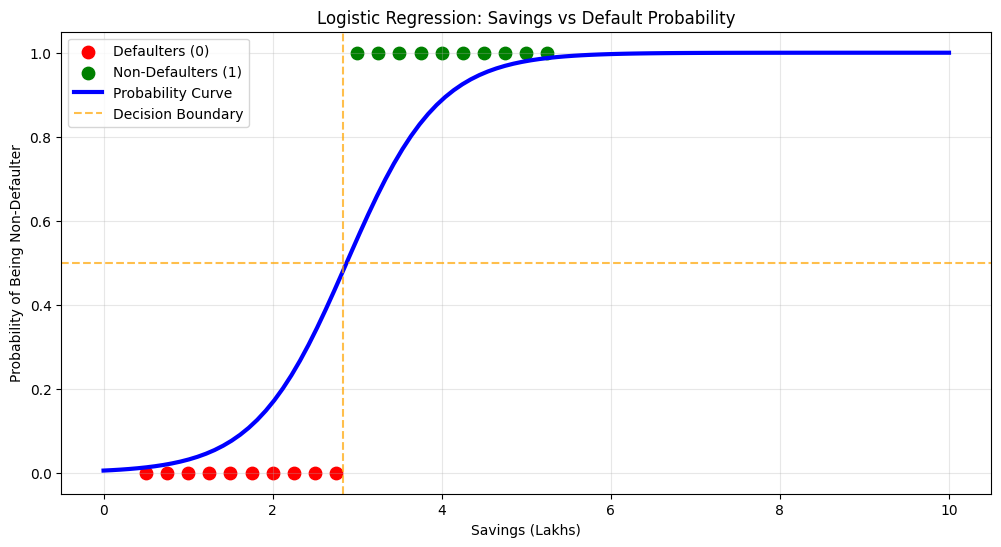

Decision Boundary: 2.83 Lakhs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create probability curve
savings_range = np.linspace(0, 10, 100).reshape(-1, 1)
# Convert to DataFrame with the same column name as the training data
savings_range_df = pd.DataFrame(savings_range, columns=['Savings'])
probabilities = model.predict_proba(savings_range_df) [:, 1]

# Plot data points
plt.scatter(df[df['NonDefaulter'] == 0]['Savings'],
            df [df['NonDefaulter'] == 0] ['NonDefaulter'],
            color='red', label='Defaulters (0)', s =80)

plt.scatter(df[df[ 'NonDefaulter'] == 1]['Savings'],
            df [df['NonDefaulter'] == 1]['NonDefaulter'],
            color='green', label='Non-Defaulters (1)', s =80)

#Plot probability curve
plt.plot(savings_range, probabilities, 'blue', linewidth=3, label='Probability Curve')
plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Decision Boundary')

#Find and show decision boundary
decision_boundary_idx = np.argmin(np.abs(probabilities - 0.5))
decision_boundary = savings_range[decision_boundary_idx] [0]
plt.axvline(x=decision_boundary, color='orange', linestyle='--', alpha=0.7)
plt.xlabel('Savings (Lakhs)')
plt.ylabel('Probability of Being Non-Defaulter')
plt.title('Logistic Regression: Savings vs Default Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Decision Boundary: {decision_boundary:.2f} Lakhs")